In [ ]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import torch.nn.functional as F

from sources.model import BeliefAutoencoder, gumbel_softmax
from sources.preprocessing import preprocessing, preprocess_sentence

def set_seed(seed=20190827):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
set_seed()

preprocessed_data = preprocessing("data/dataset_sentence_level.csv", device='cpu')
vocab = preprocessed_data.vocab
model = BeliefAutoencoder(emb_dim=300, h_dim=300, latent_dim=30, vocab=vocab, categorical_dim=2)
model.load_state_dict(torch.load("models/belief-autoencoder-gumbel-d6HnxdoH.pth", map_location='cpu'))
model.eval()

ModuleNotFoundError: No module named 'pydev_jupyter_utils'

In [2]:
sentences = ["apple", "apple"]
seq_lens = [len(s.split()) for s in sentences]
max_len = max(seq_lens)
vectorized = []
for s in sentences:
    idxs, tgt, seq_len = preprocess_sentence(s, vocab, max_len)
    vectorized.append(idxs)
tensorized = torch.tensor(vectorized)

seq_len = torch.tensor(seq_lens)
tensorized

tensor([[  1, 156,   0],
        [  1, 156,   0]])

In [3]:
with torch.no_grad():
    y_hat, qy = model(x=tensorized, seq_len=seq_len, temperature=1e-20)
#qy = gumbel_softmax(qy, temperature=1e-20,latent_dim=30, categorical_dim=2, hard=True)
qy = F.softmax(qy, dim=-1)
qy.size()

torch.Size([2, 2, 300])
torch.Size([2, 600])


torch.Size([2, 30, 2])

In [4]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

with torch.no_grad():
    x_enc, h_t, _ = model.encode(x=tensorized, seq_len=seq_len)
    x_enc = pad_packed_sequence(x_enc, batch_first=True, total_length=2)
#qy = gumbel_softmax(qy, temperature=1e-20,latent_dim=30, categorical_dim=2, hard=True)
h_t

ModuleNotFoundError: No module named 'pydev_jupyter_utils'

In [14]:
y_hat.argmax(dim=-1)

tensor([[10,  0,  0],
        [ 5,  0,  0]])

In [15]:
qy = qy.argmax(dim=-1)
qy

tensor([[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
         1, 1, 1, 0, 1, 0],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
         1, 1, 0, 1, 1, 1]])

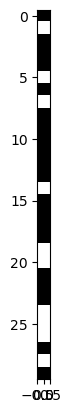

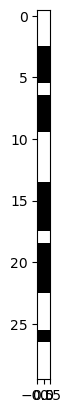

In [5]:
qy = qy.view(2, 30, 1)
latent_vectors = qy.detach().cpu().numpy()
for vector in latent_vectors:
    plt.figure()
    plt.imshow(vector, cmap='gray')
    plt.show()

In [6]:
a = qy[0]
b = qy[1]

np.count_nonzero(a!=b)

17